<a href="https://colab.research.google.com/github/CzSadykov/optimal_oil_location/blob/main/RU_optimal_oil_well_location_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Выбор локации для скважины

**Проблемная ситуация**: по заказу выдуманной добывающей компании мы решаем, где бурить новую скважину.

**Цель**: определить наиболее прибыльный регион для разработки месторождений.

**Задачи**:

1. Построить модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль.
2. Проанализировать возможную прибыль и риски техникой *Bootstrap.*

**Данные**:

Данные взяты из геологоразведки трёх регионов, каждый датасет содержит 100 000 наблюдений.
Список переменных:

* ```id``` — уникальный идентификатор скважины;
* ```f0, f1, f2``` — характеристики скважин;
* **```product```** — объём запасов в скважине (тыс. баррелей). Целевой признак.


<h1>Оглавление<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Импорт-библиотек" data-toc-modified-id="Импорт-библиотек-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Импорт библиотек</a></span></li><li><span><a href="#Загрузка-и-подготовка-данных" data-toc-modified-id="Загрузка-и-подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Загрузка и подготовка данных</a></span></li><li><span><a href="#Обучение-и-проверка-модели" data-toc-modified-id="Обучение-и-проверка-модели-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение и проверка модели</a></span><ul class="toc-item"><li><span><a href="#Регион-1" data-toc-modified-id="Регион-1-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Регион 1</a></span></li><li><span><a href="#Регион-2" data-toc-modified-id="Регион-2-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Регион 2</a></span></li><li><span><a href="#Регион-3" data-toc-modified-id="Регион-3-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Регион 3</a></span></li><li><span><a href="#Сравнение-показателей" data-toc-modified-id="Сравнение-показателей-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Сравнение показателей</a></span></li></ul></li><li><span><a href="#Подготовка-к-расчёту-прибыли" data-toc-modified-id="Подготовка-к-расчёту-прибыли-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Подготовка к расчёту прибыли</a></span></li><li><span><a href="#Расчёт-прибыли-и-рисков" data-toc-modified-id="Расчёт-прибыли-и-рисков-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Расчёт прибыли и рисков</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

## Импорт библиотек

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.utils import shuffle
from sklearn.dummy import DummyClassifier
from numpy.random import randint

from sklearn.metrics import (
    mean_squared_error,
    r2_score,
    mean_absolute_error
)

## Загрузка и подготовка данных

Загрузим данные и оценим их на предмет пропусков и типов данных.

In [ ]:
df_1 = pd.read_csv('/datasets/geo_data_0.csv')
df_2 = pd.read_csv('/datasets/geo_data_1.csv')
df_3 = pd.read_csv('/datasets/geo_data_2.csv')

In [ ]:
print(df_1.info(), '\n')
print(df_2.info(), '\n')
print(df_3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Colu

Пропусков нет, но есть явная номинальная переменная ```id```, которая в нашем исследовании не пригодится.

Её мы удалим. Позже.

In [ ]:
df_2.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


Проверим число дубликатов для каждого региона.

In [ ]:
print(df_1.duplicated().sum())
print(df_2.duplicated().sum())
print(df_3.duplicated().sum())

0
0
0


Их нет, отлично. А дублируются ли id скважин, или каждая уникальна?

In [ ]:
print(df_1['id'].duplicated().sum())
print(df_2['id'].duplicated().sum())
print(df_3['id'].duplicated().sum())

10
4
4


Да, дублируются. Будем иметь в виду.

Построим гистограммы признаков для каждого региона, чтобы оценить их распределение.

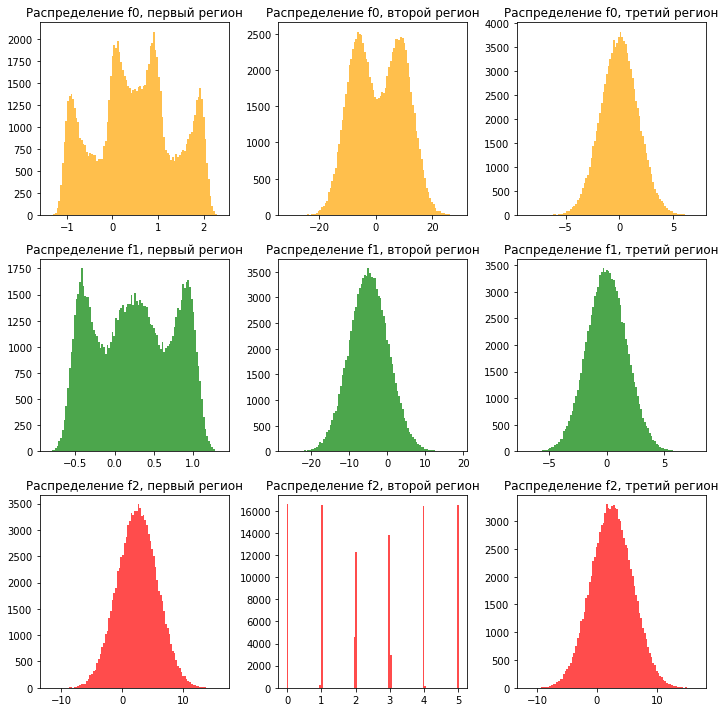

In [ ]:
fig, ax = plt.subplots(3,3, figsize=(10,10))

ax[0,0].hist(df_1['f0'], bins=100, alpha=0.7, color='orange');
ax[0,0].set_title('Распределение f0, первый регион');
ax[0,1].hist(df_2['f0'], bins=100, alpha=0.7, color='orange');
ax[0,1].set_title('Распределение f0, второй регион');
ax[0,2].hist(df_3['f0'], bins=100, alpha=0.7, color='orange');
ax[0,2].set_title('Распределение f0, третий регион');

ax[1,0].hist(df_1['f1'], bins=100, alpha=0.7, color='green');
ax[1,0].set_title('Распределение f1, первый регион');
ax[1,1].hist(df_2['f1'], bins=100, alpha=0.7, color='green');
ax[1,1].set_title('Распределение f1, второй регион');
ax[1,2].hist(df_3['f1'], bins=100, alpha=0.7, color='green');
ax[1,2].set_title('Распределение f1, третий регион');

ax[2,0].hist(df_1['f2'], bins=100, alpha=0.7, color='red');
ax[2,0].set_title('Распределение f2, первый регион');
ax[2,1].hist(df_2['f2'], bins=100, alpha=0.7, color='red');
ax[2,1].set_title('Распределение f2, второй регион');
ax[2,2].hist(df_3['f2'], bins=100, alpha=0.7, color='red');
ax[2,2].set_title('Распределение f2, третий регион');

plt.tight_layout()
plt.show()

В большинстве случаев распределение нормальное, есть и отклонения от нормы. Больше всего бросается в глаза признак ```f2``` во втором регионе. Посмотрим на него ближе.

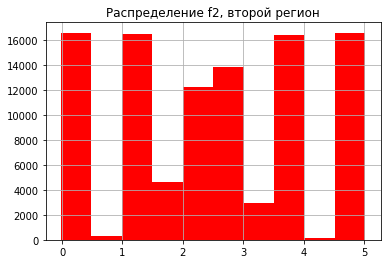

In [ ]:
hist_2_2 = df_2['f2'].hist(bins=10, color='red');
hist_2_2.set_title('Распределение f2, второй регион');

Посмотрели, но не зная специфики содержащихся в нём данных, не можем выдвинуть достаточно чётких предположений.

Посмотрим теперь на числовые характеристики данных.

In [ ]:
display(df_1.describe())
display(df_2.describe())
display(df_3.describe())

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


Явных аномалий нет. Но проверим признаки на мультиколлинеарность.

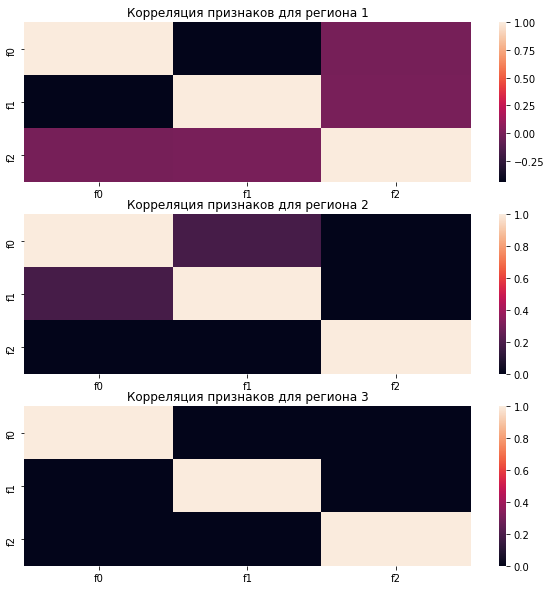

In [ ]:
fig, axes = plt.subplots(3, figsize=(10,10))

sns.heatmap(df_1[['f0','f1','f2']].corr(), ax=axes[0])
sns.heatmap(df_2[['f0','f1','f2']].corr(), ax=axes[1])
sns.heatmap(df_3[['f0','f1','f2']].corr(), ax=axes[2])

axes[0].set_title('Корреляция признаков для региона 1')
axes[1].set_title('Корреляция признаков для региона 2')
axes[2].set_title('Корреляция признаков для региона 3')

plt.show()

<div class="alert alert-block alert-warning"><b>Комментарий ревьюера V-2</b>
    
<b>Совет:</b><br>
Для отображения коэффициентов на тепловой карте можно использовать параметр `annot = True`
* Еще можно проверить коэффициент корреляции признаков и целевой переменной. Это имеет смысл, т.к. высокий коэффициент корреляции признака и целевой переменной говорит о сильной линейной зависимости, что в пользу точности предсказаний:)
</div>

Корреляции между признаками практически нет, ура.

Посмотрим теперь на распределение целевого признака.

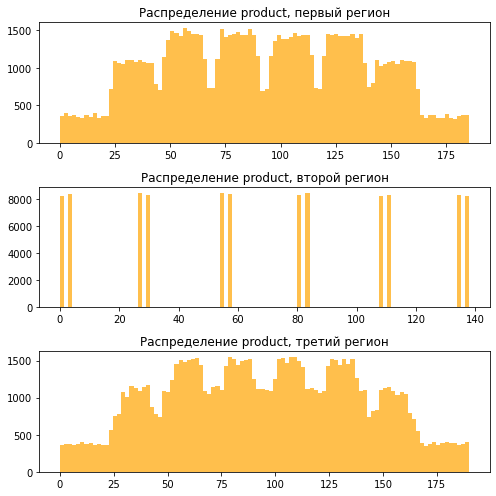

In [ ]:
fig, axes = plt.subplots(3, figsize=(7,7))

axes[0].hist(df_1['product'], bins=100, alpha=0.7, color='orange');
axes[0].set_title('Распределение product, первый регион');
axes[1].hist(df_2['product'], bins=100, alpha=0.7, color='orange');
axes[1].set_title('Распределение product, второй регион');
axes[2].hist(df_3['product'], bins=100, alpha=0.7, color='orange');
axes[2].set_title('Распределение product, третий регион');

plt.tight_layout()
plt.show()

Распределение в первом и втором регионе близко к нормальному (есть очертания колокола), но интересны флуктуации – например, спады на значениях около 50, 75, 100 – то есть, с шагом 25. Любопытно.

Что касается второго региона, в нём значения добычи ещё более фрагментированы, а распределение целевого признака напоминает распределение характеристики f2. Что ж, опять же, не зная специфики данных, можем лишь гадать.

Подготовим датасеты для обучения, выделив целевой признак.

In [ ]:
dataframes = [df_1, df_2, df_3]

def process(df):
    df = df.drop(columns='id')
    target = df['product']
    features = df.drop(columns='product')
    return features, target

In [ ]:
features_1, target_1 = process(df_1)
features_2, target_2 = process(df_2)
features_3, target_3 = process(df_3)

## Обучение и проверка модели

### Регион 1

Начнём с обычной линейной регрессии (UPD: ею же и закончим :)). Сперва разобьём датасеты на тренировочную и валидационную выборку.

In [ ]:
RANDOM_STATE = 11235

features_1_train, features_1_valid, target_1_train, target_1_valid = train_test_split(features_1,
                                                                             target_1,
                                                                             test_size=0.25,
                                                                             random_state=RANDOM_STATE)

print(features_1_train.shape)
print(target_1_train.shape)
print(features_1_valid.shape)
print(target_1_valid.shape)

(75000, 3)
(75000,)
(25000, 3)
(25000,)


Разбилось корректно. Теперь обучим модель и посчитаем её среднеквадратичное отклонение.

In [ ]:
model_1 = LinearRegression()
model_1.fit(features_1_train, target_1_train)
rmse_1 = mean_squared_error(target_1_valid, model_1.predict(features_1_valid)) ** 0.5
print(f'Среднеквадратичное отклонение линейной регрессии в регионе 1 составляет {rmse_1:.2f}')

Среднеквадратичное отклонение линейной регрессии в регионе 1 составляет 37.67


Оценим отклонение, посмотрев на среднее значение предсказаний.

In [ ]:
print(f'Среднее значение предсказаний линейной регрессии в регионе 1 составляет \
{model_1.predict(features_1_valid).mean():.2f}')

Среднее значение предсказаний линейной регрессии в регионе 1 составляет 92.38


Отклонение кажется достаточно большим, но по условию задачи для большей предсказуемости будем применять именно линейную регрессию. Что ж. Сохраним предсказания и посмотрим на все ключевые характеристики модели разом.

In [ ]:
predictions_1 = pd.Series(model_1.predict(features_1_valid), index=target_1_valid.index)
r2_1 = r2_score(target_1_valid, predictions_1)
mae_1 = mean_absolute_error(target_1_valid, predictions_1)

print(f'Среднее значение предсказаний для региона 1 составляет {predictions_1.mean():.2f}')
print(f'Среднеквадратичное отклонение использованной модели – {rmse_1:.2f}')
print(f'Коэффициент детерминации – {r2_1:.2f}')
print(f'Среднее абсолютное отклонение – {mae_1:.2f}')

Среднее значение предсказаний для региона 1 составляет 92.38
Среднеквадратичное отклонение использованной модели – 37.67
Коэффициент детерминации – 0.28
Среднее абсолютное отклонение – 31.02


Качество далеко от идеала, но повторим процедуру для других регионов.

### Регион 2

Повторим всё то же самое для региона №2.

In [ ]:
features_2_train, features_2_valid, target_2_train, target_2_valid = train_test_split(features_2,
                                                                             target_2,
                                                                             test_size=0.25,
                                                                             random_state=RANDOM_STATE)

In [ ]:
model_2 = LinearRegression()
model_2.fit(features_2_train, target_2_train)
rmse_2 = mean_squared_error(target_2_valid, model_2.predict(features_2_valid)) ** 0.5
print(f'Среднеквадратичное отклонение линейной регрессии в регионе 2 составляет {rmse_2:.2f}')

Среднеквадратичное отклонение линейной регрессии в регионе 2 составляет 0.89


Подозрительно небольшое отклонение, оценим все характеристики.

In [ ]:
predictions_2 = pd.Series(model_2.predict(features_2_valid), index=target_2_valid.index)
r2_2 = r2_score(target_2_valid, predictions_2)
mae_2 = mean_absolute_error(target_2_valid, predictions_2)

print(f'Среднее значение предсказаний для региона 2 составляет {predictions_2.mean():.2f}')
print(f'Среднеквадратичное отклонение использованной модели – {rmse_2:.2f}')
print(f'Коэффициент детерминации – {r2_2:.5f}')
print(f'Среднее абсолютное отклонение – {mae_2:.2f}')

Среднее значение предсказаний для региона 2 составляет 68.54
Среднеквадратичное отклонение использованной модели – 0.89
Коэффициент детерминации – 0.99962
Среднее абсолютное отклонение – 0.72


Удивительно низкие значения отклонений (rmse и mae) и высокий коэффициент детерминации. Ладно, не будем жаловаться на идеальность.

### Регион 3

Повторим процедуру для региона №3.

In [ ]:
features_3_train, features_3_valid, target_3_train, target_3_valid = train_test_split(features_3,
                                                                             target_3,
                                                                             test_size=0.25,
                                                                             random_state=RANDOM_STATE)

In [ ]:
model_3 = LinearRegression()
model_3.fit(features_3_train, target_3_train)
rmse_3 = mean_squared_error(target_3_valid, model_3.predict(features_3_valid)) ** 0.5
print(f'Среднеквадратичное отклонение линейной регрессии в регионе 3 составляет {rmse_3:.2f}')

Среднеквадратичное отклонение линейной регрессии в регионе 3 составляет 40.00


Примерно как в первом регионе. Сохраним предсказания и оценим все характеристики.

In [ ]:
predictions_3 = pd.Series(model_3.predict(features_3_valid), index=target_3_valid.index)
r2_3 = r2_score(target_3_valid, predictions_3)
mae_3 = mean_absolute_error(target_3_valid, predictions_3)

print(f'Среднее значение предсказаний для региона 3 составляет {predictions_3.mean():.2f}')
print(f'Среднеквадратичное отклонение использованной модели – {rmse_3:.2f}')
print(f'Коэффициент детерминации – {r2_3:.2f}')
print(f'Среднее абсолютное отклонение – {mae_3:.2f}')

Среднее значение предсказаний для региона 3 составляет 94.92
Среднеквадратичное отклонение использованной модели – 40.00
Коэффициент детерминации – 0.20
Среднее абсолютное отклонение – 32.71


Коэффициент детерминации – 0,2. Да, с радостью бы опробовал другие модели, но условие так условие :)

### Сравнение показателей

Визуализируем разницу показателей для наглядности.

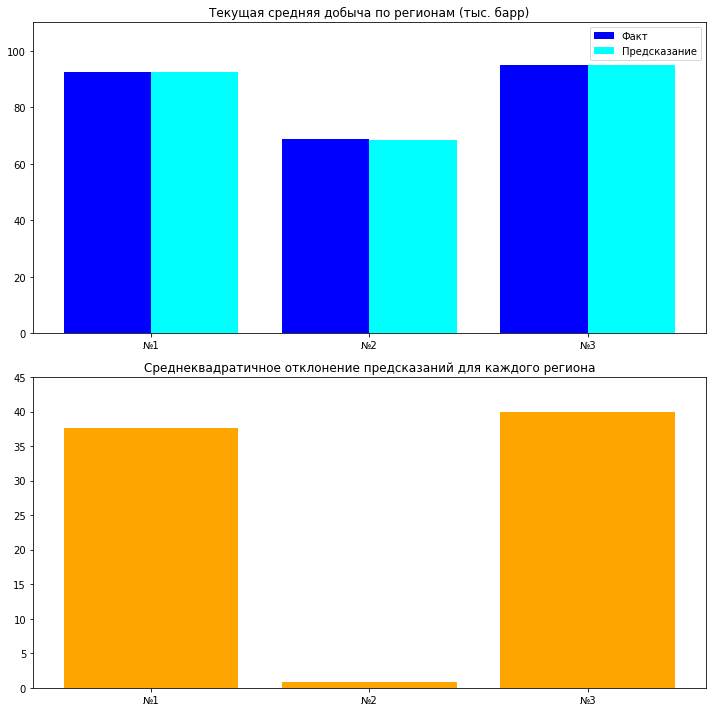

In [ ]:
fig, ax = plt.subplots(2,1, figsize=(10,10));

region_bars = ['№1', '№2', '№3']
region_height = [target_1.mean(), target_2.mean(), target_3.mean()]
prediction_height = [predictions_1.mean(), predictions_2.mean(), predictions_3.mean()]

width = 0.4
ind = np.arange(len(region_bars))

ax[0].bar(ind - width/2, region_height, width, color='blue', label='Факт');
ax[0].bar(ind + width/2, prediction_height, width, color='cyan', label='Предсказание');
ax[0].set_title('Текущая средняя добыча по регионам (тыс. барр)');
ax[0].set_ylim(0,110);
ax[0].set_xticks(ind)
ax[0].set_xticklabels(region_bars)
ax[0].legend()

rmse_bars = ['№1', '№2', '№3']
rmse_height = [rmse_1, rmse_2, rmse_3]
ax[1].bar(rmse_bars, rmse_height, color='orange');
ax[1].set_title('Среднеквадратичное отклонение предсказаний для каждого региона');
ax[1].set_ylim(0,45);

plt.tight_layout()

plt.show();


Средние значения предсказаний практически не отличаются от средних фактических данных.

Бросается в глаза, насколько более качественно модели работают для региона №2. Но поскольку специфика данных нам неизвестна, выдвинуть осмысленные предположения мы пока не можем.


Для верности оценим количественно разницу средних в фактических данных и предсказаниях.

In [ ]:
print(region_height)
print(prediction_height)

[92.50000000000001, 68.82500000000002, 95.00000000000004]
[92.38496873374059, 68.53753761594476, 94.92033651991625]


Да, она минимальна.

## Подготовка к расчёту прибыли

Запишем основные вводные, которые пригодятся нам для расчётов.

In [ ]:
BUDGET_RUB = 10_000_000_000
UNIT = 1000
UNIT_REVENUE = 450
THRESHOLD = 200
LOSSLESS_PROD_MARGIN = BUDGET_RUB / (UNIT * UNIT_REVENUE) / THRESHOLD

print(f'{LOSSLESS_PROD_MARGIN:.2f} \n')

111.11 



* ```budget_rub``` – бюджет на разработку месторождений в каждом регионе (10 000 000 000 рублей).
* ```unit``` – единица измерения целевого признака (1 тысяча баррелей).
* ```unit_revenue``` – выручка с одного барреля (450 рублей).
* ```lossless_production_margin ``` – число баррелей для достижения порога безубыточности в регионе (22 222 222 барреля).

Оценим, сколько нужно освоить месторождений  в каждом регионе для достижения порога безубыточности.

Возьмём для оценки среднее значение наших предсказаний по каждому региону.

In [ ]:
for i in prediction_height:
    print(f'{LOSSLESS_PROD_MARGIN/i:.3f}', '\n')

1.203 

1.621 

1.171 



Исходя из предсказанных средних значений добычи, в каждом регионе достаточно будет освоить **по два** месторождения (при условии, что их показатели будут сооветствовать предсказанным нами средним)...

Но чтобы свести риски к нулю и выделить наиболее прибыльные скважины, сделаем функцию для расчёта прибыли.

In [ ]:
def estimate_profit(target, predictions, count):
    sources = pd.Series(predictions).sort_values(ascending=False)
    selected_sources = target[sources.index][:count]
    sum_revenue = selected_sources.sum() * UNIT * UNIT_REVENUE
    return sum_revenue - BUDGET_RUB

## Расчёт прибыли и рисков

Теперь сделаем функцию на основе метода Bootstrap, чтобы на основе 1000 случайных подвыборок по 500 наблюдений выделить 200 наиболее прибыльных месторождений.

Выделив по 200 лучших месторождений 1000 раз, мы рассчитаем 1000 возможных прибылей. И запишем их в отдельный список.

Для этих прибылей мы рассчитаем среднее и доверительный интервал на уровне доверительной вероятности 95%.

Также рассчитаем вероятность убыточности месторождений – заказчику важно, чтобы она была **не более 2,5%**.

In [ ]:
def bootstrap_sources(target, predictions, region):
    values = []
    state = np.random.RandomState(RANDOM_STATE)
    for i in range(1000):
        target_subsample = target.sample(n=500, replace=True, random_state=state)
        predictions_subsample = predictions[target_subsample.index]
        values.append(estimate_profit(target_subsample, predictions_subsample, THRESHOLD))

    values = pd.Series(values)
    mean = values.mean()
    lower = values.quantile(0.025)
    upper = values.quantile(0.975)
    loss_probability = (values[values<0].count())/len(values)

    return print(f'Прогнозируемая средняя прибыль для региона {region} – {mean:,.2f} рублей. \n\
95% доверительный интервал – от {lower:,.2f} до {upper:,.2f} рублей. \n\
Вероятность убытка – {loss_probability:.2%}.')

Применим эту функцию для каждого региона.

In [ ]:
bootstrap_sources(target_1_valid, predictions_1, 1)
print()
bootstrap_sources(target_2_valid, predictions_2, 2)
print()
bootstrap_sources(target_3_valid, predictions_3, 3)

Прогнозируемая средняя прибыль для региона 1 – 435,996,589.20 рублей. 
95% доверительный интервал – от -48,391,147.29 до 944,401,611.52 рублей. 
Вероятность убытка – 4.60%.

Прогнозируемая средняя прибыль для региона 2 – 477,052,539.63 рублей. 
95% доверительный интервал – от 74,463,435.37 до 888,676,356.26 рублей. 
Вероятность убытка – 1.00%.

Прогнозируемая средняя прибыль для региона 3 – 375,005,031.18 рублей. 
95% доверительный интервал – от -196,572,758.78 до 931,375,110.82 рублей. 
Вероятность убытка – 9.50%.


Вероятности убытка в регионах №1 и №3 слишком большие! Остаётся регион №2 – к счастью, предсказанная в нём средняя прибыль всё равно наибольшая относительно трёх регионов.

## Выводы

По итогам анализа мы можем рекомендовать регион 2 для разработки месторождений. Причины:

* Вероятность убытков составляет **1%**;
* Прогнозируемая средняя прибыль – **477 052 540** рублей;
* С вероятностью 95% средняя прибыль будет находиться в диапазоне от **74 463 435** до **888 676 356** рублей.

Использованная модель – линейная регрессия. Причём для второго региона модель оказалась наиболее качественной. Судя по всему, из-за специфики входных данных. Характеристики модели:

* Среднеквадратичное отклонение – 0.89
* Коэффициент детерминации – 0.99962
* Среднее абсолютное отклонение – 0.72